In [200]:
!pip install numpy pandas opendatasets scikit-learn --quiet

In [201]:
import opendatasets as od
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [202]:
df = pd.read_csv('https://raw.githubusercontent.com/asrorKholmatov/melb_data.csv/refs/heads/main/a1_dataset.csv')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


In [204]:
df.shape

(925, 8)

In [205]:
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [206]:
df.isna().sum()

target      0
var1        0
var2        0
var3        0
var4      600
var5        0
var6        0
var7        0
dtype: int64

In [207]:
df.head()

,target,var1,var2,var3,var4,var5,var6,var7
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35


In [208]:
def split_year(df):
    df['var7'] = pd.to_datetime(df['var7'], errors='coerce')
    df['Month'] = df.var7.dt.month
    df['Weekday'] = df.var7.dt.weekday

In [209]:
split_year(df)

In [210]:
df

,target,var1,var2,var3,var4,var5,var6,var7,Month,Weekday
0,0,509.18,417.681,Micronesia,138.0,393.00,no,2019-07-20 13:21:37,7.0,5.0
1,0,446.06,666.182,Dominica,81.0,352.05,yes,2019-04-04 21:30:46,4.0,3.0
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,2019-03-03 02:59:37,3.0,6.0
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,2019-03-19 08:00:58,3.0,1.0
4,0,453.08,600.156,Cameroon,105.0,422.95,no,2019-03-18 13:22:35,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,Belarus,NaN,350.45,yes,2019-01-22 12:58:14,1.0,1.0
921,1,342.62,473.919,Japan,NaN,200.85,no,2019-02-01 14:37:34,2.0,4.0
922,1,265.10,538.170,Saint Martin,NaN,208.35,yes,2019-06-13 18:50:00,6.0,3.0
923,0,397.12,622.386,Chad,NaN,433.45,yes,2019-05-27 06:19:27,5.0,0.0


In [211]:
df.drop('var7', axis=1, inplace=True)

In [212]:
df.isna().sum().sort_values(ascending=False)

var4       600
Month        5
Weekday      5
target       0
var1         0
var2         0
var3         0
var5         0
var6         0
dtype: int64

In [213]:
df['Month'] = df['Month'].fillna(0)
df['Weekday'] = df['Weekday'].fillna(0)

In [214]:
df['Month'] = df['Month'].astype(int)
df['Weekday'] = df['Weekday'].astype(int)

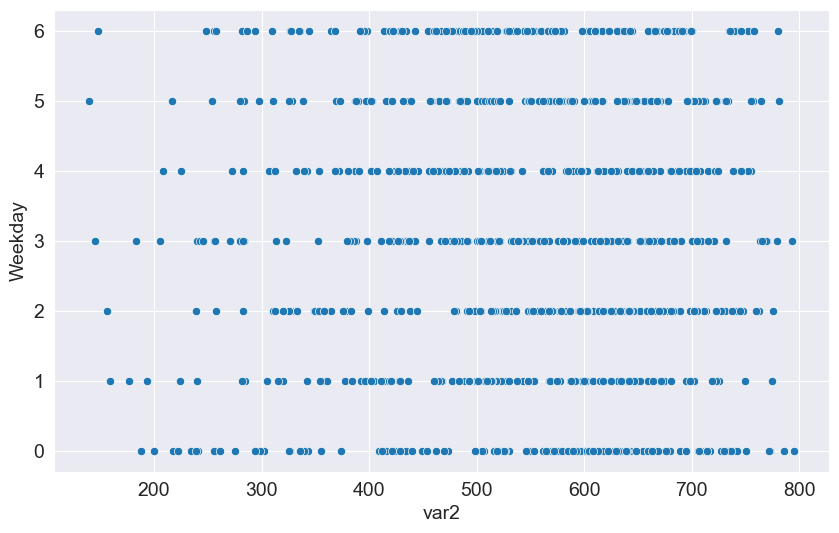

In [215]:
sns.scatterplot(data=df, x='var2', y='Weekday')
plt.show()

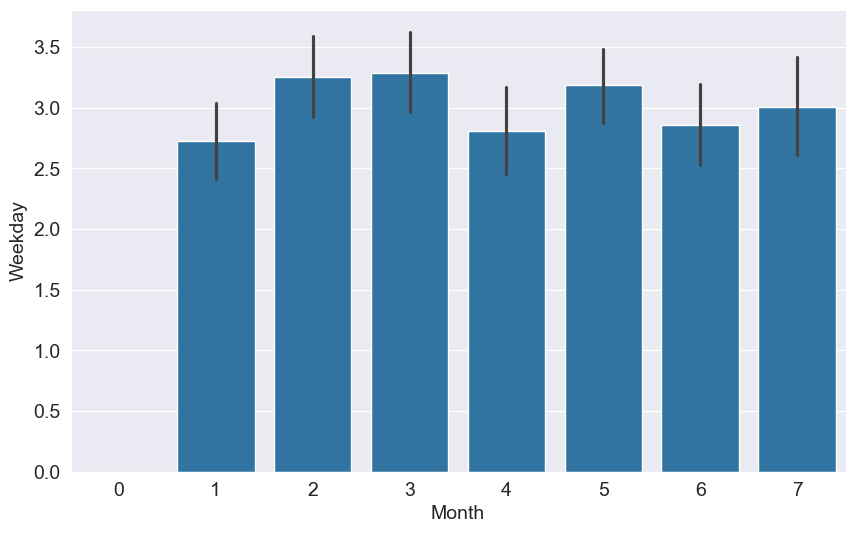

In [216]:
sns.barplot(data=df, x='Month', y='Weekday')
plt.show()

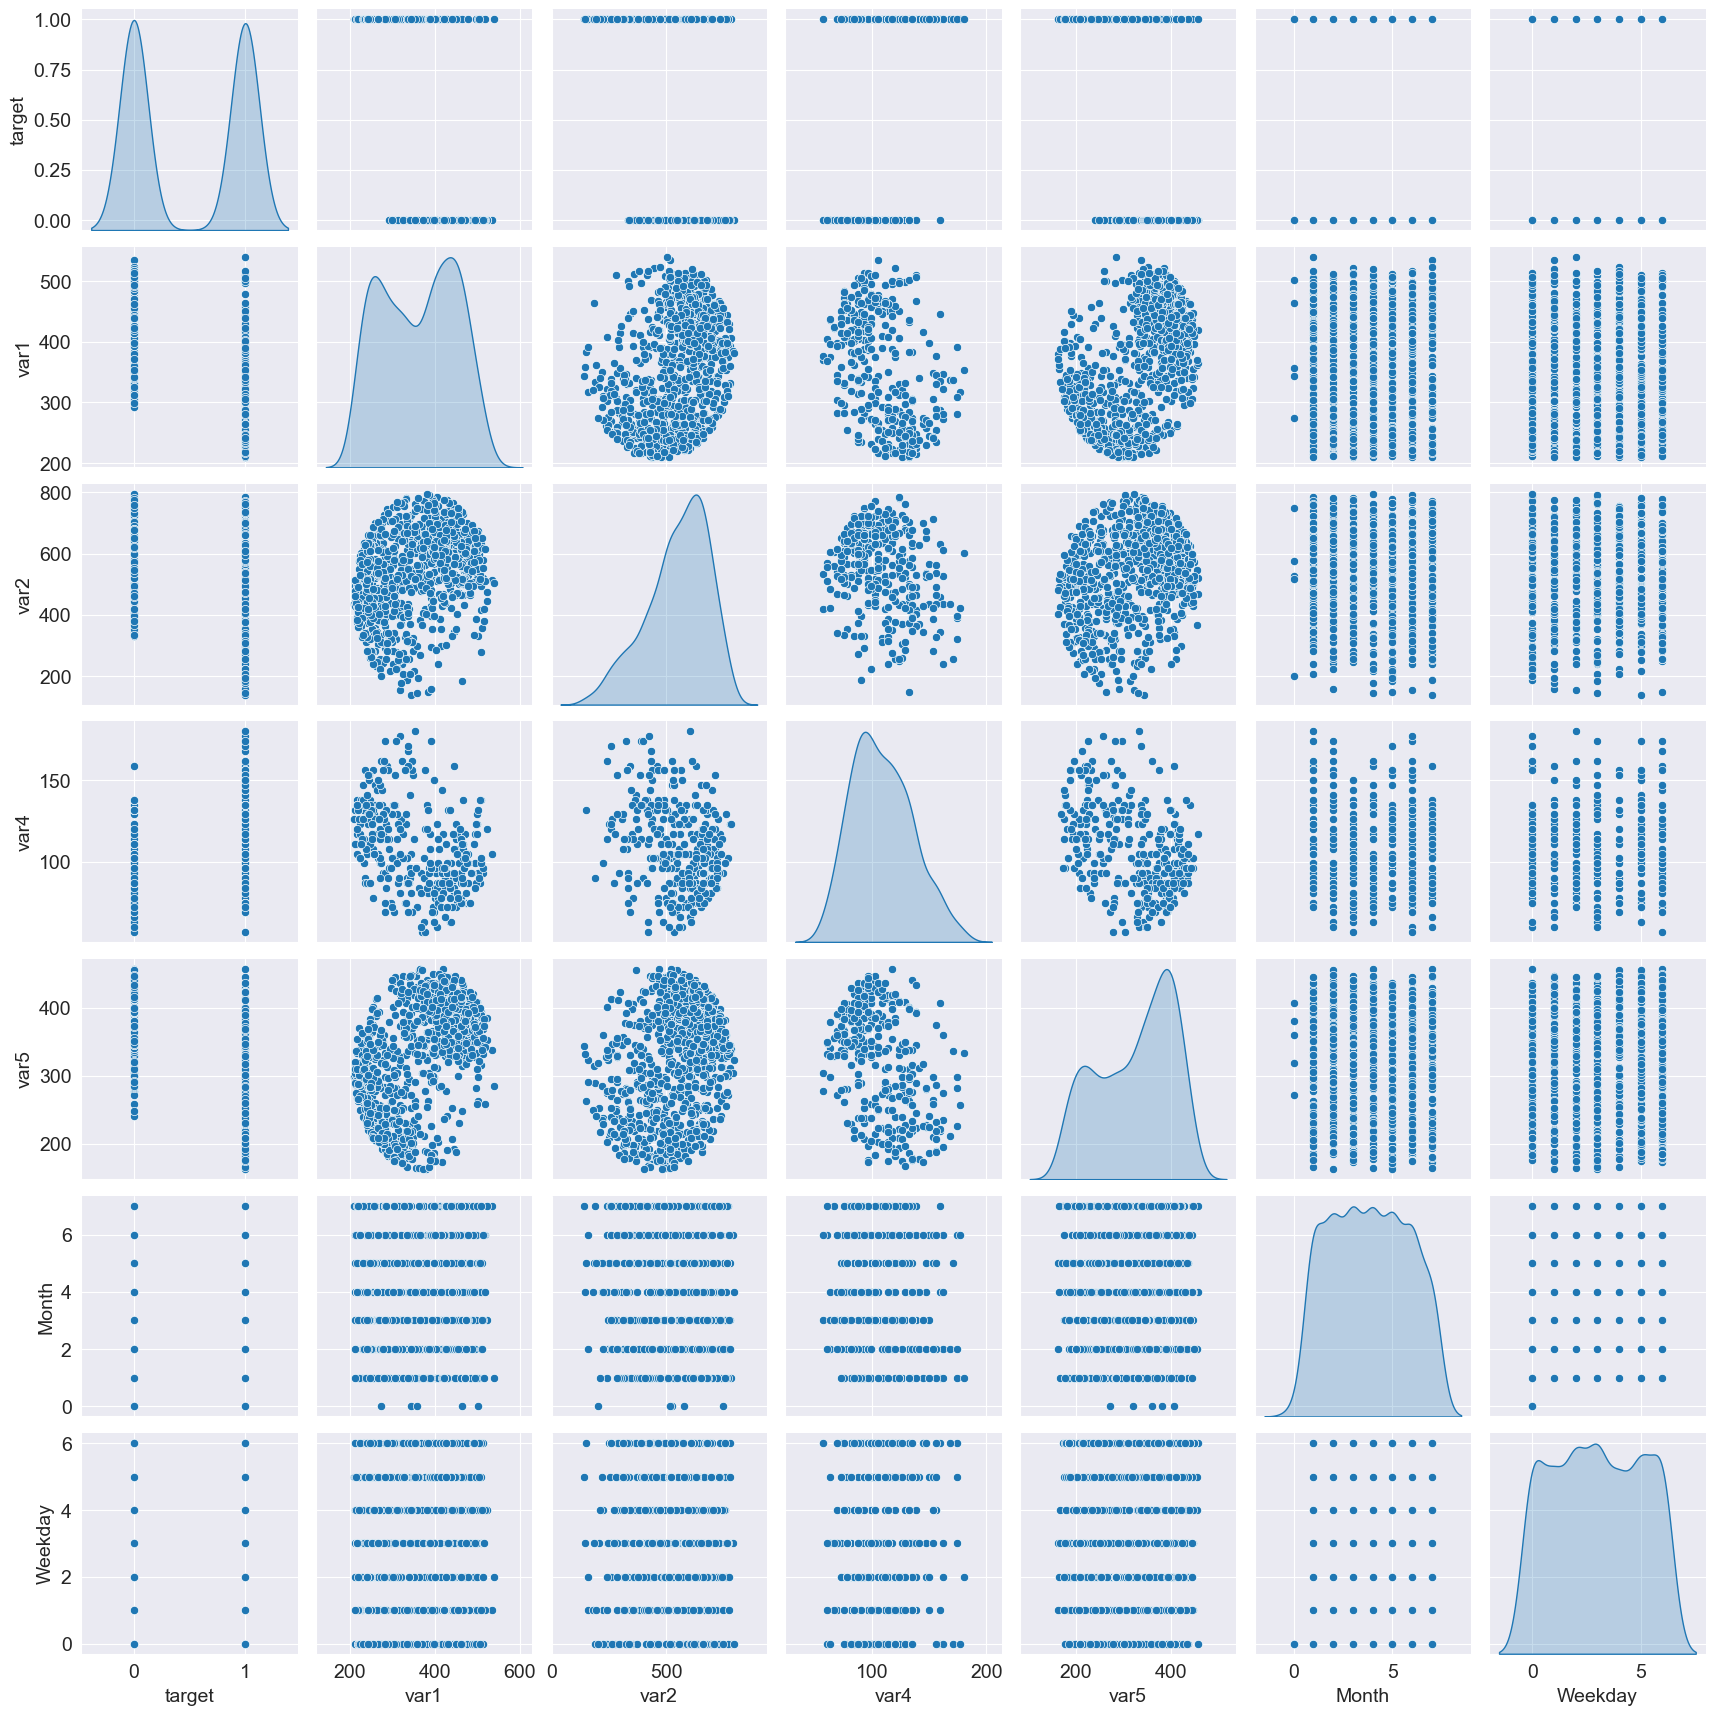

In [217]:
sns.pairplot(df, diag_kind="kde")  # yoki diag_kind="hist"
plt.show()

In [218]:
df

,target,var1,var2,var3,var4,var5,var6,Month,Weekday
0,0,509.18,417.681,Micronesia,138.0,393.00,no,7,5
1,0,446.06,666.182,Dominica,81.0,352.05,yes,4,3
2,1,235.50,398.097,Isle of Man,90.0,339.00,no,3,6
3,0,306.02,518.163,Turkmenistan,102.0,439.25,yes,3,1
4,0,453.08,600.156,Cameroon,105.0,422.95,no,3,0
...,...,...,...,...,...,...,...,...,...
920,0,422.34,547.259,Belarus,NaN,350.45,yes,1,1
921,1,342.62,473.919,Japan,NaN,200.85,no,2,4
922,1,265.10,538.170,Saint Martin,NaN,208.35,yes,6,3
923,0,397.12,622.386,Chad,NaN,433.45,yes,5,0


In [219]:
numeric_cols = ['var1', 'var2', 'var5']
categorical_cols = ['var3', 'var6','Month', 'Weekday']

In [220]:
from sklearn.preprocessing import MinMaxScaler

In [221]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [222]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [223]:
from sklearn.preprocessing import OneHotEncoder

In [224]:
encoder = OneHotEncoder(sparse_output=False,).fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [283]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

In [226]:
df

,target,var1,var2,var3,var4,var5,var6,Month,Weekday,var3_Afghanistan,var3_Albania,var3_Algeria,var3_American Samoa,var3_Andorra,var3_Angola,var3_Anguilla,var3_Antarctica (the territory South of 60 deg S),var3_Antigua and Barbuda,var3_Argentina,var3_Armenia,var3_Aruba,var3_Australia,var3_Austria,var3_Azerbaijan,var3_Bahamas,var3_Bahrain,var3_Bangladesh,var3_Barbados,var3_Belarus,var3_Belgium,var3_Belize,var3_Benin,var3_Bermuda,var3_Bhutan,var3_Bolivia,var3_Bosnia and Herzegovina,var3_Bouvet Island (Bouvetoya),var3_Brazil,var3_British Indian Ocean Territory (Chagos Archipelago),var3_British Virgin Islands,var3_Brunei Darussalam,var3_Bulgaria,var3_Burkina Faso,var3_Burundi,var3_Cambodia,var3_Cameroon,var3_Canada,var3_Cape Verde,var3_Cayman Islands,var3_Central African Republic,var3_Chad,var3_Chile,var3_China,var3_Christmas Island,var3_Colombia,var3_Comoros,var3_Congo,var3_Cook Islands,var3_Costa Rica,var3_Cote d'Ivoire,var3_Croatia,var3_Cuba,var3_Cyprus,var3_Czech Republic,var3_Denmark,var3_Djibouti,var3_Dominica,var3_Dominican Republic,var3_Ecuador,var3_Egypt,var3_El Salvador,var3_Equatorial Guinea,var3_Eritrea,var3_Estonia,var3_Ethiopia,var3_Falkland Islands (Malvinas),var3_Faroe Islands,var3_Fiji,var3_Finland,var3_France,var3_French Guiana,var3_French Polynesia,var3_French Southern Territories,var3_Gabon,var3_Gambia,var3_Georgia,var3_Germany,var3_Ghana,var3_Gibraltar,var3_Greece,var3_Greenland,var3_Grenada,var3_Guadeloupe,var3_Guam,var3_Guatemala,var3_Guernsey,var3_Guinea,var3_Guinea-Bissau,var3_Guyana,var3_Haiti,var3_Heard Island and McDonald Islands,var3_Holy See (Vatican City State),var3_Honduras,var3_Hong Kong,var3_Hungary,var3_Iceland,var3_India,var3_Indonesia,var3_Iran,var3_Ireland,var3_Isle of Man,var3_Israel,var3_Italy,var3_Jamaica,var3_Japan,var3_Jersey,var3_Jordan,var3_Kazakhstan,var3_Kenya,var3_Kiribati,var3_Korea,var3_Kuwait,var3_Kyrgyz Republic,var3_Lao People's Democratic Republic,var3_Latvia,var3_Lebanon,var3_Lesotho,var3_Liberia,var3_Libyan Arab Jamahiriya,var3_Liechtenstein,var3_Lithuania,var3_Luxembourg,var3_Macao,var3_Macedonia,var3_Madagascar,var3_Malawi,var3_Malaysia,var3_Maldives,var3_Mali,var3_Malta,var3_Marshall Islands,var3_Martinique,var3_Mauritania,var3_Mauritius,var3_Mayotte,var3_Mexico,var3_Micronesia,var3_Moldova,var3_Monaco,var3_Mongolia,var3_Montenegro,var3_Montserrat,var3_Morocco,var3_Mozambique,var3_Myanmar,var3_Namibia,var3_Nauru,var3_Nepal,var3_Netherlands,var3_Netherlands Antilles,var3_New Caledonia,var3_New Zealand,var3_Nicaragua,var3_Niger,var3_Niue,var3_Norfolk Island,var3_Northern Mariana Islands,var3_Norway,var3_Pakistan,var3_Palau,var3_Palestinian Territory,var3_Panama,var3_Papua New Guinea,var3_Paraguay,var3_Peru,var3_Philippines,var3_Pitcairn Islands,var3_Poland,var3_Portugal,var3_Puerto Rico,var3_Qatar,var3_Reunion,var3_Russian Federation,var3_Rwanda,var3_Saint Barthelemy,var3_Saint Helena,var3_Saint Kitts and Nevis,var3_Saint Lucia,var3_Saint Martin,var3_Saint Pierre and Miquelon,var3_Saint Vincent and the Grenadines,var3_Samoa,var3_San Marino,var3_Sao Tome and Principe,var3_Saudi Arabia,var3_Senegal,var3_Serbia,var3_Seychelles,var3_Sierra Leone,var3_Singapore,var3_Slovakia (Slovak Republic),var3_Slovenia,var3_Somalia,var3_South Africa,var3_South Georgia and the South Sandwich Islands,var3_Spain,var3_Sri Lanka,var3_Sudan,var3_Suriname,var3_Svalbard & Jan Mayen Islands,var3_Swaziland,var3_Sweden,var3_Switzerland,var3_Syrian Arab Republic,var3_Taiwan,var3_Tajikistan,var3_Tanzania,var3_Thailand,var3_Timor-Leste,var3_Togo,var3_Tokelau,var3_Tonga,var3_Trinidad and Tobago,var3_Tunisia,var3_Turkey,var3_Turkmenistan,var3_Turks and Caicos Islands,var3_Tuvalu,var3_Uganda,var3_Ukraine,var3_United Arab Emirates,var3_United Kingdom,var3_United States Minor Outlying Islands,var3_United States Virgin Islands,var3_United States of America,var3_Uruguay,var3_Uzbekistan,var3_Vanuatu,var3_Venezuela,var3_Vietnam,var3_Wallis and Futuna,var3_Western Sahara,var3_Yemen,var3_Zambia,var3_Zimbabwe,var6_no,va

In [227]:
df_missing = df[df.isna().any(axis=1)]
test_missing_input = df_missing[numeric_cols + encoded_cols]

In [228]:
df_clean = df[df.notna().all(axis=1)]

In [229]:
X = df_clean[numeric_cols + encoded_cols]
y = df_clean['target']

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
model_linear = LinearRegression(n_jobs=-1)

In [234]:
model_linear.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [235]:
train_preds = model_linear.predict(X_train)
test_preds = model_linear.predict(X_test)

In [236]:
from sklearn.metrics import mean_squared_error

In [237]:
def evaluate_model(train_preds, test_preds):
    mse1  = mean_squared_error(train_preds, y_train)
    mse2  = mean_squared_error(test_preds, y_test)
    rmse1 = np.sqrt(mse1)
    rmse2 = np.sqrt(mse2)
    return rmse1, rmse2

In [238]:
evaluate_model(train_preds, test_preds)

(0.11223354947429362, 0.23352479562537815)

In [239]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, train_preds) * 100
print(f"R² score: {r2:.2f}%")

R² score: 94.96%


In [240]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_preds) * 100
print(f"R² score: {r2:.2f}%")

R² score: 78.14%


In [241]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [242]:
model_2 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

In [243]:
%%time
model_2.fit(X_train, y_train)

CPU times: total: 4min 40s
Wall time: 1min 12s


,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [244]:
rain_preds = model_2.predict(X_train)
test_preds = model_2.predict(X_test)

In [245]:
def evaluate_model(train_preds, test_preds):
    mse1  = mean_squared_error(train_preds, y_train)
    mse2  = mean_squared_error(test_preds, y_test)
    rmse1 = np.sqrt(mse1)
    rmse2 = np.sqrt(mse2)
    return rmse1, rmse2

In [246]:
evaluate_model(train_preds, test_preds)

(0.11223354947429362, 0.18643289813670844)

In [247]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, train_preds) * 100
print(f"R² score: {r2:.2f}%")

R² score: 94.96%


In [248]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, test_preds) * 100
print(f"R² score: {r2:.2f}%")

R² score: 86.07%


In [249]:
test_miss_preds = model_2.predict(test_missing_input)

In [250]:
df.loc[df['var4'].isna(), 'var4'] = test_miss_preds

In [251]:
df.isna().sum().sort_values(ascending=False)

target                           0
var3_Niue                        0
var3_Northern Mariana Islands    0
var3_Norway                      0
var3_Pakistan                    0
                                ..
var3_Guadeloupe                  0
var3_Guam                        0
var3_Guatemala                   0
var3_Guernsey                    0
Weekday_6                        0
Length: 262, dtype: int64

In [252]:
X = df[numeric_cols + encoded_cols+['var4']]
y = df['target'].copy()

In [280]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_pca.shape, X.shape

((925, 20), (925, 257))

In [255]:
pca.explained_variance_ratio_

array([9.98834079e-01, 1.73369554e-04, 5.81574282e-05, 5.69899264e-05,
       5.55525082e-05, 5.39451946e-05, 5.18633288e-05, 5.03424481e-05,
       4.96772127e-05, 4.78746263e-05, 4.56845863e-05, 4.48265929e-05,
       4.16285512e-05, 3.88912122e-05, 3.53951506e-05, 1.21585119e-05,
       1.15425182e-05, 3.28130414e-06, 2.90838041e-06, 2.89510710e-06])

In [256]:
pca.n_components_

20

In [272]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=3, shuffle=True, random_state=42)

scores = []

for train_idx, val_idx in kf.split(X_pca):
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

accuracies = []
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    print(f"K = {k}, Accuracy = {acc:.4f}")
    scores.append(acc)

print(f"Average Accuracy over 3 fold: {np.mean(scores):.4f}")

K = 1, Accuracy = 0.8279
K = 2, Accuracy = 0.7565
K = 3, Accuracy = 0.7987
K = 4, Accuracy = 0.7727
K = 5, Accuracy = 0.7890
K = 6, Accuracy = 0.7890
K = 7, Accuracy = 0.8117
K = 8, Accuracy = 0.8279
K = 9, Accuracy = 0.8539
K = 10, Accuracy = 0.8571
Average Accuracy over 3 fold: 0.8084


In [281]:
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=3, shuffle=True, random_state=42)
model_2 = LogisticRegression(max_iter=1000)

scores = []

for train_idx, val_idx in kf.split(X_pca):
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model_2.fit(X_train, y_train)
    y_pred = model_2.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

print(f"Average Accuracy over 3 folds: {np.mean(scores):.4f}")

Average Accuracy over 3 folds: 0.9589


In [282]:
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=3, shuffle=True, random_state=42)
model_3 = GaussianNB()

scores = []

for train_idx, val_idx in kf.split(X_pca):
    X_train, X_val = X_pca[train_idx], X_pca[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model_3.fit(X_train, y_train)
    y_pred = model_2.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)

print(f"Average Accuracy over 3 folds: {np.mean(scores):.4f}")

Average Accuracy over 3 folds: 0.9611
